[View in Colaboratory](https://colab.research.google.com/github/MaharshiYeluri01/MachineLearningProjects/blob/master/Lstm_MilkProduction.ipynb)

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

In [2]:
uploads=files.upload()

Saving monthly-milk-production.csv to monthly-milk-production (1).csv


In [3]:
for fn in uploads.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploads[fn])))

User uploaded file "monthly-milk-production.csv" with length 4390 bytes


In [0]:
import pandas as pd
df=pd.read_csv('monthly-milk-production.csv',index_col='Month')

In [5]:
df.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [0]:
df.index=pd.to_datetime(df.index)

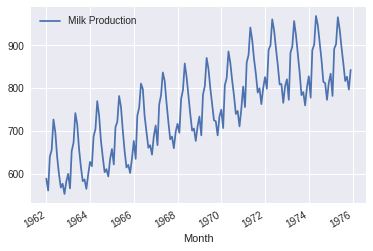

In [7]:
df.plot()

In [0]:
train_data=df.head(156)
test_data=df.tail()

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax_scalar=MinMaxScaler()


In [0]:
train_data=minmax_scalar.fit_transform(train_data)


In [0]:
test_data=minmax_scalar.transform(test_data)

In [0]:
def next_batch(batch_size,steps):
  rand_start=np.random.randint(0,len(train_data)-steps)
  y_pred=train_data[rand_start:rand_start+steps+1].reshape(1,steps+1)
  return y_pred[:,:-1].reshape(-1,steps,1), y_pred[:,1:].reshape(-1,steps,1)

In [0]:
num_inputs=1
num_neurons=50
num_outputs=1
num_time_steps=12


In [0]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [0]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)

In [0]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [0]:
loss = tf.reduce_mean(tf.square(outputs - y)) 
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

In [0]:
init=tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [20]:
with tf.Session() as sess:
  sess.run(init)
  epochs=3000
  for epoch in range(epochs):
    X_batch,y_batch=next_batch(1,num_time_steps)
    sess.run(train,feed_dict={X:X_batch,y:y_batch})
    if epoch%100 == 0:      
      mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
      print(epoch, "\tMSE:", mse)
  saver.save(sess, "./milk_model")

(0, '\tMSE:', 0.17884032)
(100, '\tMSE:', 0.028880874)
(200, '\tMSE:', 0.018234143)
(300, '\tMSE:', 0.014050617)
(400, '\tMSE:', 0.03764838)
(500, '\tMSE:', 0.018933384)
(600, '\tMSE:', 0.02965647)
(700, '\tMSE:', 0.021478085)
(800, '\tMSE:', 0.018622521)
(900, '\tMSE:', 0.0084889075)
(1000, '\tMSE:', 0.015109964)
(1100, '\tMSE:', 0.008490967)
(1200, '\tMSE:', 0.00984832)
(1300, '\tMSE:', 0.0093629)
(1400, '\tMSE:', 0.0087800445)
(1500, '\tMSE:', 0.010097324)
(1600, '\tMSE:', 0.0134012)
(1700, '\tMSE:', 0.014623024)
(1800, '\tMSE:', 0.014644151)
(1900, '\tMSE:', 0.010526185)
(2000, '\tMSE:', 0.010873509)
(2100, '\tMSE:', 0.008778612)
(2200, '\tMSE:', 0.0072306595)
(2300, '\tMSE:', 0.0116218375)
(2400, '\tMSE:', 0.008758531)
(2500, '\tMSE:', 0.009049148)
(2600, '\tMSE:', 0.011909178)
(2700, '\tMSE:', 0.00789098)
(2800, '\tMSE:', 0.00500866)
(2900, '\tMSE:', 0.0055869506)


In [0]:
with tf.Session() as sess:
    saver.restore(sess, "./milk_model")
    train_seed = list(train_data[-12:])
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        print(y_pred)
        print(y_pred[0, -1, 0])
        train_seed.append(y_pred[0, -1, 0])

In [0]:
train_seed

In [0]:
results = minmax_scalar.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [30]:
results

array([[826.31354],
       [851.31525],
       [880.8497 ],
       [908.9882 ],
       [932.34393],
       [943.36914],
       [939.03436],
       [926.60846],
       [912.5048 ],
       [901.7598 ],
       [895.1092 ],
       [896.55963]], dtype=float32)